# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
combined_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
# Checking the number of mice.
combined_mouse_data["Mouse ID"].nunique()

249

In [34]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = combined_mouse_data.loc[combined_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [35]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_mouse_data.loc[combined_mouse_data["Mouse ID"] == "g989"]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [36]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = combined_mouse_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [37]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_data["Mouse ID"].nunique()

249

## Summary Statistics

In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# mean
mean = clean_mouse_data["Tumor Volume (mm3)"].groupby(clean_mouse_data["Drug Regimen"]).mean()
# median
median = clean_mouse_data["Tumor Volume (mm3)"].groupby(clean_mouse_data["Drug Regimen"]).median()
# variance
var = clean_mouse_data["Tumor Volume (mm3)"].groupby(clean_mouse_data["Drug Regimen"]).var()
# standard deviation
std = clean_mouse_data["Tumor Volume (mm3)"].groupby(clean_mouse_data["Drug Regimen"]).std()
# SEM
sem = clean_mouse_data["Tumor Volume (mm3)"].groupby(clean_mouse_data["Drug Regimen"]).sem()

stat_table = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": var, "Tumor Volume Standard Deviation": std, "Tumor Volume SEM": sem})
stat_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [39]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_method = clean_mouse_data.groupby(clean_mouse_data["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
aggregate_method


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timpoints'>

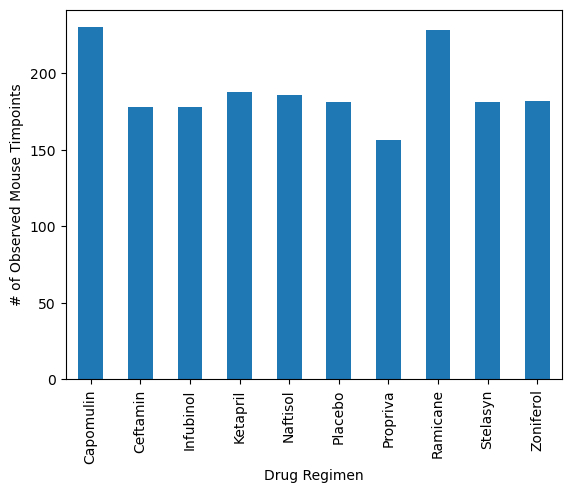

In [40]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count = clean_mouse_data.groupby(["Drug Regimen"]).count()['Mouse ID']
regimen_count.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timpoints')

<function matplotlib.pyplot.show(close=None, block=None)>

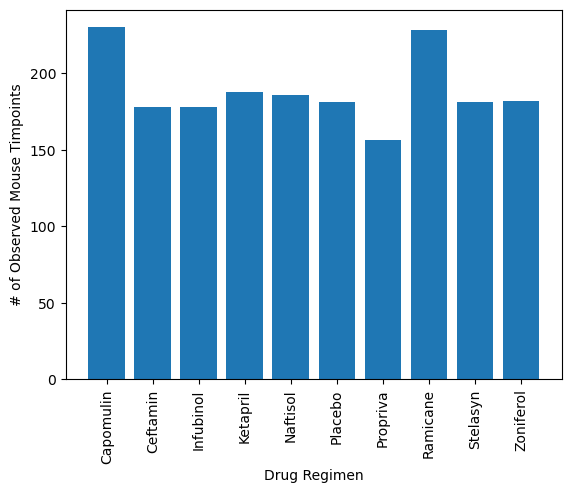

In [41]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_value = regimen_count.index.values
y_value = regimen_count.values

plt.bar(x_value, y_value)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timpoints')
plt.xticks(rotation='vertical')
plt.show

<Axes: ylabel='Sex'>

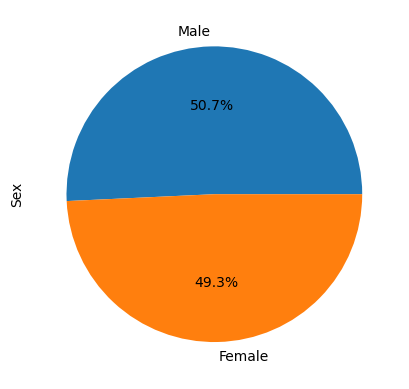

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_percent = clean_mouse_data["Sex"].value_counts()
sex_percent.plot(kind='pie', autopct="%1.1f%%", ylabel='Sex')

Text(0.5, 1.0, 'Female vs Male Mice')

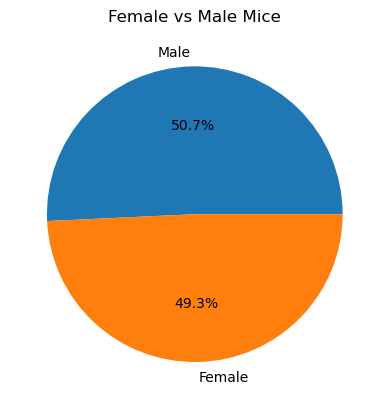

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_percent = clean_mouse_data["Sex"].value_counts()
labels = ["Male", "Female"]

plt.pie(sex_percent, labels=labels, autopct="%1.1f%%")
plt.title("Female vs Male Mice")

## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
last_tp = clean_mouse_data.groupby(['Mouse ID'])['Timepoint'].max()
last_tp_df = pd.DataFrame(last_tp)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tp_tumor = pd.merge(clean_mouse_data, last_tp_df, on=('Mouse ID', 'Timepoint'), how='right')
last_tp_tumor.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [45]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_cap = []
tumor_ram = []
tumor_inf = []
tumor_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_tp_tumor.iterrows():
    if row["Drug Regimen"] == drug_list[0]:
        tumor_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == drug_list[1]:
        tumor_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == drug_list[2]:
        tumor_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == drug_list[3]:
        tumor_cef.append(row['Tumor Volume (mm3)'])
    

# add subset 
drug_df = pd.DataFrame({drug_list[0]: tumor_cap, 
                        drug_list[1]: tumor_ram,
                        drug_list[2]: tumor_inf,
                        drug_list[3]: tumor_cef})

# Determine outliers using upper and lower bounds

# Created a dictionary to store all drug values
outlier_data = {
    'Lower Quartile': [],
    'Median': [],
    'Upper Quartile': [],
    'IQR': [],
    'Lower Bound': [],
    'Upper Bound': [],
    'Max': [],
    'Min': []
}

# Ran all drugs from drug list through for loop so I wouldn't have to repeat the same code for each drug
for drug in drug_list:
    quartiles = drug_df[drug].quantile([.25, .5, .75])
    low, med, up = quartiles[.25], quartiles[.5], quartiles[.75]
    iqr = up - low
    lowb = low - (1.5 * iqr)
    upb = up + (1.5 * iqr)
    max_val = drug_df[drug].max()
    min_val = drug_df[drug].min()

# Added the calculated values to each corresponding list in the dictionary
    outlier_data['Lower Quartile'].append(low)
    outlier_data['Median'].append(med)
    outlier_data['Upper Quartile'].append(up)
    outlier_data['IQR'].append(iqr)
    outlier_data['Lower Bound'].append(lowb)
    outlier_data['Upper Bound'].append(upb)
    outlier_data['Max'].append(max_val)
    outlier_data['Min'].append(min_val)

# Created a dataframe from the dictionary data
outliers = pd.DataFrame(outlier_data, index=drug_list)

# Grouping the datagrame by the drugs listed in drug_list and summarizing
outliers_group = outliers.groupby(level=0).sum()
outliers_group


,Lower Quartile,Median,Upper Quartile,IQR,Lower Bound,Upper Bound,Max,Min
Capomulin,32.377357,38.125164,40.159220,7.781863,20.704562,51.832015,47.685963,23.343598
Ceftamin,48.722078,59.851956,64.299830,15.577752,25.355450,87.666458,68.923185,45.000000
Infubinol,54.048608,60.165180,65.525743,11.477135,36.832905,82.741446,72.226731,36.321346
Ramicane,31.560470,36.561652,40.659006,9.098537,17.912664,54.306811,45.220869,22.050126


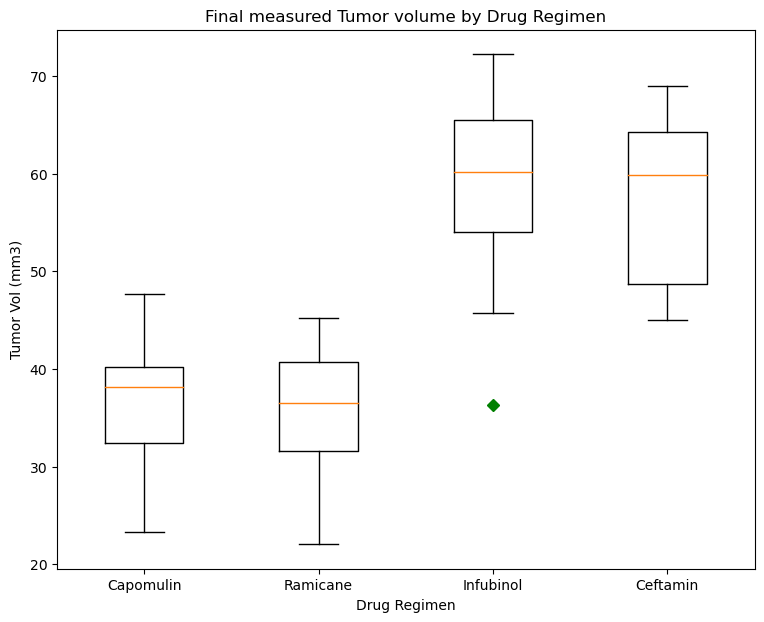

In [46]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = [drug_df[drug_list[0]],
                drug_df[drug_list[1]],
                drug_df[drug_list[2]],
                drug_df[drug_list[3]]
               ]

fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')

ax.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4], drug_list)
plt.show()

## Line and Scatter Plots

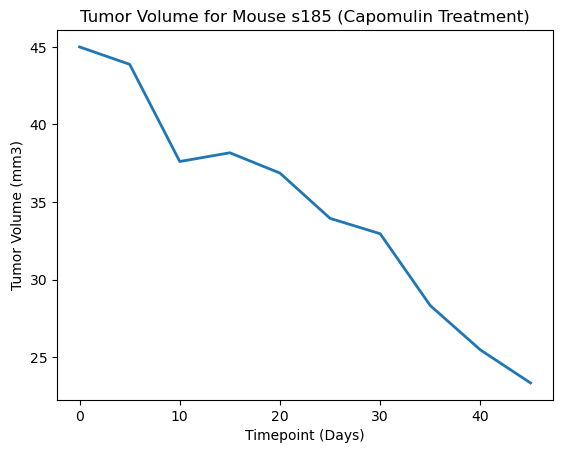

In [47]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Created a dataframe with specific mouse using the .loc() function and a boolean to find s185 data
line_df = clean_mouse_data.loc[clean_mouse_data["Mouse ID"] == "s185",:]

# defined the x axis list by calling the timepoints from the l509 dataframe
timpoint_x = line_df["Timepoint"] 
# defined the y axis or tumor size list by calling the tumor size from the dataframe
tumor_size_y = line_df["Tumor Volume (mm3)"] 

plt.title('Tumor Volume for Mouse s185 (Capomulin Treatment)')

# Plotted the newly established timepoint_x and tumor_size_y for x and y axis
plt.plot(timpoint_x, tumor_size_y,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

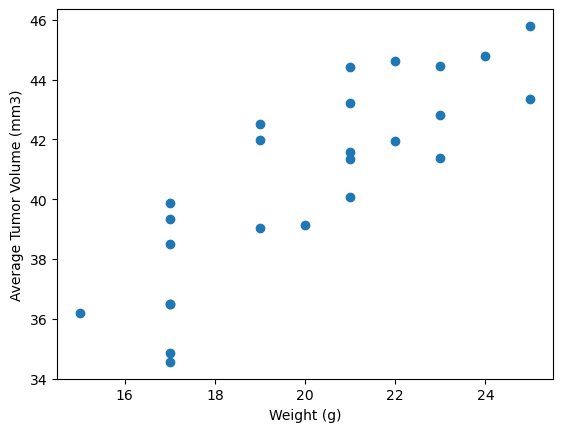

In [48]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Created dataframe using .loc() of the drug regimine Capomulin
cap_df = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == "Capomulin",:]

# New dataframe created with 
capavg = cap_df.groupby(['Mouse ID']).mean(numeric_only=True)

# Created scatter plot of the x axis (weight) and the y axis (tumor size) by calling from the capavg dataframe
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


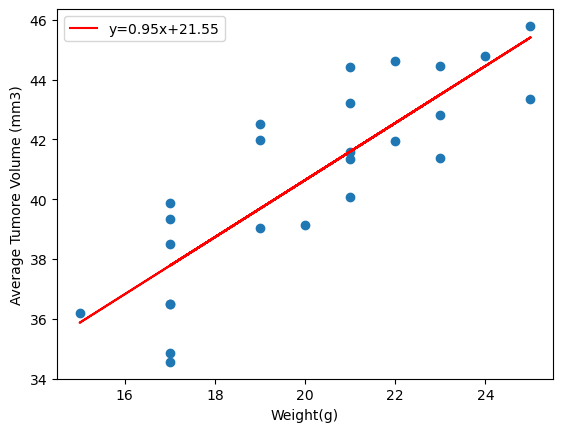

In [31]:
# Calculate the correlation coefficient and a linear regression model 

# Called the Pearson function for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])

slope = 0.9544396890241045
intercept = 21.552160532685015
line = slope*(capavg['Weight (g)'])+intercept


# create the scatter plot like above
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])

# plot the linear regression line which is the averaged line of all the values in red
plt.plot(capavg['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

# included legend with the redline slope formula using plt.legend()
plt.legend()
plt.show()